In [1]:
import pandas as pd
df = pd.read_csv('WifiProbe.csv')

In [2]:
len(df)

2106560

In [3]:
#remove duplicate SSIDs
df_nodupes = df.drop_duplicates(['SSID'])

In [4]:
len(df_nodupes)

1030

In [5]:
df_nodupes.head()

,﻿id,device,timestamp,BSSID,SSID,autoJoinStatus,blackListTimestamp,capabilities,distanceCm,distanceSdCm,...,level,numConnection,numIpConfigFailures,numUsage,seen,timestamp.1,tsf,untrusted,wifiSsid_octets_buf,wifiSsid_octets_count
0,738fb79c-7fb2-4923-a650-a8340d331272-2,17c3398d-1ec4-4a91-9e71-535b7854ebcb,1.452329e+09,4c:72:b9:1a:98:0d,sknepal,0,0,[WPA-PSK-TKIP][ESS],-1,-1,...,-70,0,0,0,1452329337545,1.452329e+09,103113166415,False,115,7
32,738fb79c-7fb2-4923-a650-a8340d331272-3,17c3398d-1ec4-4a91-9e71-535b7854ebcb,1.452329e+09,b0:48:7a:a2:a1:e0,TP-LINK_A2A1E0,0,0,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][ESS],-1,-1,...,-86,0,0,0,1452329337545,1.452329e+09,103113166415,True,84,14
320,738fb79c-7fb2-4923-a650-a8340d331272-12,17c3398d-1ec4-4a91-9e71-535b7854ebcb,1.452331e+09,c8:3a:35:32:76:b9,Tenda_3276B8,0,0,[WPA2-PSK-CCMP+TKIP][ESS],-1,-1,...,-89,0,0,0,1452330536459,1.452331e+09,104312058540,True,84,12
1152,57f59167-774c-4cd7-b557-37a34110b109-14,17c3398d-1ec4-4a91-9e71-535b7854ebcb,1.447040e+09,24:9e:ab:e8:e0:68,shiva123,0,0,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][ESS],-1,-1,...,-89,0,0,0,1447040274255,1.447040e+09,511070703568,True,115,8
1408,0dc8c3b7-9046-449b-b573-ccfa5790ea92-46,17c3398d-1ec4-4a91-9e71-535b7854ebcb,1.455966e+09,b0:48:7a:c9:f5:0a,sumitran,0,0,[WPA2-PSK-CCMP+TKIP][ESS],-1,-1,...,-40,0,0,0,1455966345876,1.455966e+09,122476762,False,115,8


In [6]:
wep = df_nodupes[df_nodupes['capabilities'].str.contains("WEP", na=False)]

In [7]:
#wep networks
len(wep)

15

In [8]:
#check whether there is some null value
df_nodupes.isnull().sum()

﻿id                      0
device                   0
timestamp                0
BSSID                    0
SSID                     1
autoJoinStatus           0
blackListTimestamp       0
capabilities             0
distanceCm               0
distanceSdCm             0
frequency                0
isAutoJoinCandidate      0
level                    0
numConnection            0
numIpConfigFailures      0
numUsage                 0
seen                     0
timestamp.1              0
tsf                      0
untrusted                0
wifiSsid_octets_buf      0
wifiSsid_octets_count    0
dtype: int64

In [9]:
# we see that there is an SSID with a null value
# let's replace it with 'none'
df_nodupes.fillna('none', inplace=True)

/home/conf/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2650: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [10]:
# run the command once again to make sure that there are no null values
df_nodupes.isnull().sum()

﻿id                      0
device                   0
timestamp                0
BSSID                    0
SSID                     0
autoJoinStatus           0
blackListTimestamp       0
capabilities             0
distanceCm               0
distanceSdCm             0
frequency                0
isAutoJoinCandidate      0
level                    0
numConnection            0
numIpConfigFailures      0
numUsage                 0
seen                     0
timestamp.1              0
tsf                      0
untrusted                0
wifiSsid_octets_buf      0
wifiSsid_octets_count    0
dtype: int64

In [11]:
# lets group the nearby wifi networks together
# i.e. any networks that were discovered within a range of 30 minutes will belong to the same group
i = 0
j = 1
nearby_wifi = {}
while True:
    try:
        if (abs(int(str(df_nodupes.iloc[i]['seen'])[:-3]) - int(str(df_nodupes.iloc[j]['seen'])[:-3]))/60 <= 30): 
            if df_nodupes.iloc[i]['SSID'] not in nearby_wifi:
                nearby_wifi[df_nodupes.iloc[i]['SSID']] = list()
            nearby_wifi[df_nodupes.iloc[i]['SSID']].append(df_nodupes.iloc[j]['SSID'])
            j=j+1
        else:
            i=j
            j=j+1
    except:
        break


In [12]:
# so we've grouped the 1000 something individual networks to 128 groups
len(nearby_wifi)

128

In [13]:
# here's an example of a grouped network
nearby_wifi['deerwalk-hotspot']

['FRONTECH',
 'ntc',
 'SAA',
 'DWIT-hotspot',
 'TP-LINK_789639',
 '11n AP',
 'NETMAXWIFI',
 'sAG']

In [16]:
# let us create a graph for all the network groups
# just for visualization purpose. it is not necessary at all. 

i = 0
j=1
import pydot
graph = pydot.Dot(graph_type='graph')

while True:
    try:
        if (abs(int(str(df_nodupes.iloc[i]['seen'])[:-3]) - int(str(df_nodupes.iloc[j]['seen'])[:-3]))/60 <= 30): 
            parent = df_nodupes.iloc[i]['SSID']
            child = df_nodupes.iloc[j]['SSID']
            edge = pydot.Edge(parent, child)
            graph.add_edge(edge)
            j=j+1
        else:
            i=j
            j=j+1
            graph.write_png('wifi' + str(i) + '.png')
            graph = pydot.Dot(graph_type='graph')
    except:   
        break


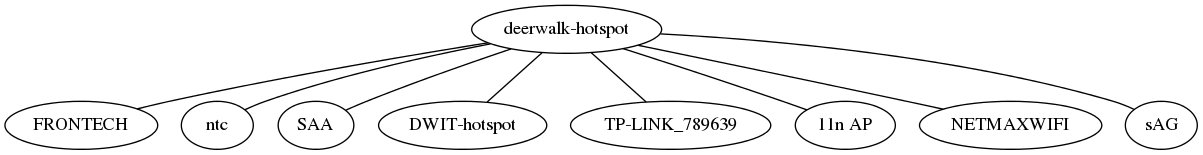

In [17]:
# an example of a network group, drawn as a graph

from IPython.display import Image
Image('wifi36.png')


In [19]:
# Make request to Google geolocation API with the WiFi details of each network group

import requests
import json
import time


details = {"details":[]}
key = "YOUR API HERE"

def geocode(wifi_data, wifi_name):
    URL = 'https://www.googleapis.com/geolocation/v1/geolocate?key=' + key
    data = json.dumps(wifi_data)
    r = requests.post(URL, data, headers={'Content-Type': 'application/json'})
    info = json.loads(r.text)
    details['details'].append({'wifi': wifi_name, 'lat': info['location']['lat'], 'lng':info['location']['lng'], 'accuracy':info['accuracy']})
    
    
for wifiap_key, wifiap_values in nearby_wifi.items():
    data = {"wifiAccessPoints": [ ]}
    mac_key = df_nodupes.loc[df_nodupes['SSID'] == wifiap_key, 'BSSID'].values[0]
    ss_key = df_nodupes.loc[df_nodupes['SSID'] == wifiap_key, 'level'].values[0]
    data['wifiAccessPoints'].append({'macAddress': mac_key, 'signalStrength': ss_key})

    for wifiap in wifiap_values:
        mac_value = df_nodupes.loc[df_nodupes['SSID'] == wifiap, 'BSSID'].values[0]
        ss_value = df_nodupes.loc[df_nodupes['SSID'] == wifiap, 'level'].values[0]
        data['wifiAccessPoints'].append({'macAddress': mac_value, 'signalStrength': ss_value})
    geocode(data, wifiap_key)
    time.sleep(2)


In [20]:
details['details'][0]

{'accuracy': 40.0, 'lat': 27.7350677, 'lng': 85.3097375, 'wifi': 'Wise_Vianet'}

In [21]:
# visualizing the accuracy received
raw_accuracy=[]
for i in range(128):
    raw_accuracy.append(details['details'][i]['accuracy'])

(array([ 103.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   25.]),
 array([   22. ,   371.4,   720.8,  1070.2,  1419.6,  1769. ,  2118.4,
         2467.8,  2817.2,  3166.6,  3516. ]),
 <a list of 10 Patch objects>)

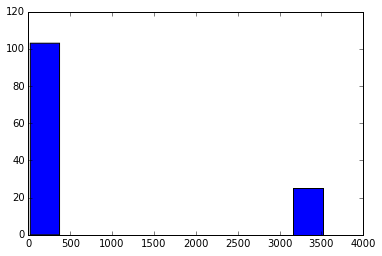

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(raw_accuracy)


In [23]:
import copy
new_accuracy = copy.deepcopy(raw_accuracy)
len(new_accuracy)

128

In [24]:
# remove the points that have accuracy over 3k
fixed_accuracy = [x for x in new_accuracy if x < 3000]
len(fixed_accuracy)

103

(array([ 52.,  18.,  12.,  10.,   2.,   5.,   2.,   1.,   0.,   1.]),
 array([  22. ,   50.4,   78.8,  107.2,  135.6,  164. ,  192.4,  220.8,
         249.2,  277.6,  306. ]),
 <a list of 10 Patch objects>)

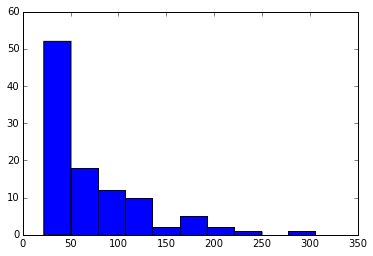

In [25]:
# now plot the distribution of the new accuracies after having removed over 3k accuracy points
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(fixed_accuracy)


In [26]:
print details['details'][0]['lat'], details['details'][0]['lng']


27.7350677 85.3097375


In [27]:
# turn it into a format of list within list: [['comma separated wifi names of a network group', latitute, longitude]]
location=[]
for i in range(128):
    if details['details'][i]['accuracy'] < 3000:
        nearby_wifi[details['details'][i]['wifi']].append(details['details'][i]['wifi'])
        
        location.append([', '.join(nearby_wifi[details['details'][i]['wifi']]), details['details'][i]['lat'], details['details'][i]['lng']])


In [28]:
len(location)

103

In [29]:
# this is the format we need the data in
# copy the output of location list and paste it onto the 'markers' variable in the wifiviz.html file.
location[0]

['PPPoE BSD ParkHorizon, KHARAYOO, TP-LINK_BB63F8, bharat guest house, Suvadeep2, Wise_Vianet',
 27.7350677,
 85.3097375]

In [30]:
# Let's then reverse geocode the co-ordinates to place names
import geocoder
streets = []
cities = []
for i in range(1, len(location)):
    g = geocoder.google([location[i][1],location[i][2]], method='reverse')
    streets.append(g.street)
    cities.append(g.city)

In [31]:
print streets[0], cities[0]

Dhapasi Marg Kathmandu


<IPython.core.display.Javascript object>


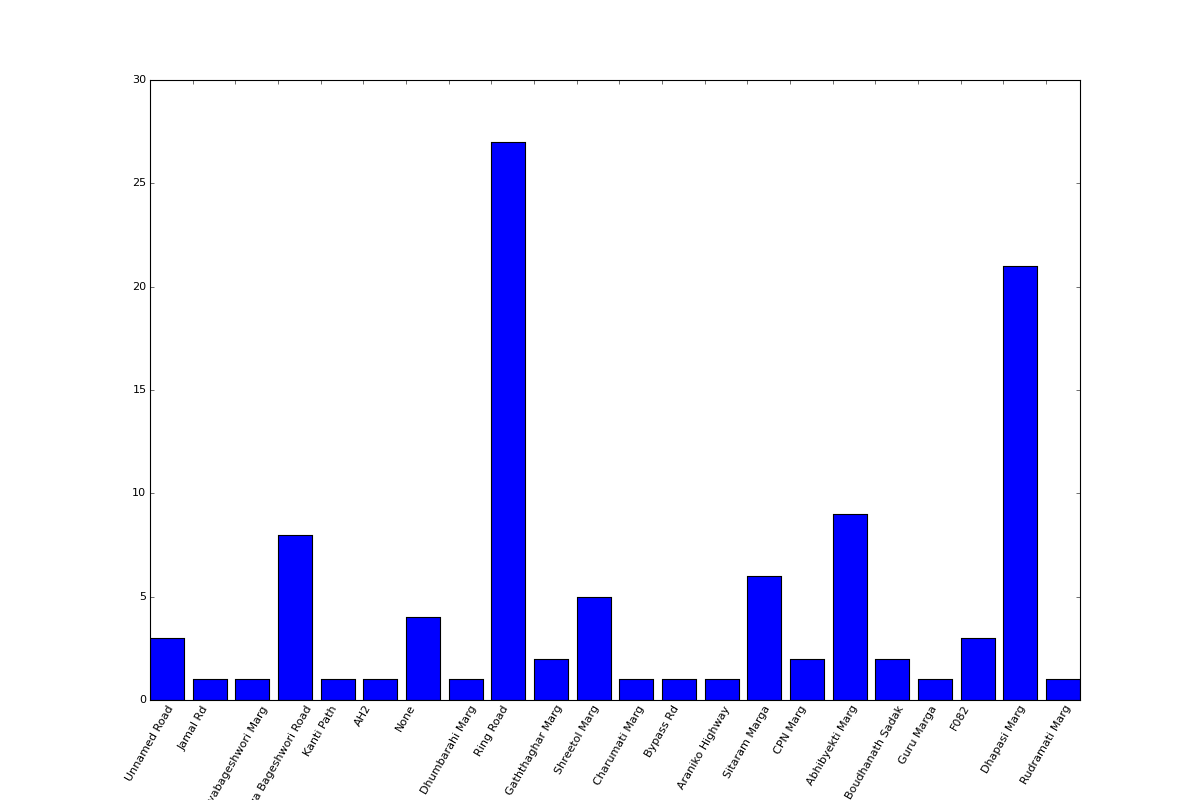

<Container object of 22 artists>

In [33]:
%matplotlib notebook
import collections
x = collections.Counter(streets)
l = range(len(x.keys()))
plt.figure(figsize=(15,10))
plt.xticks(l, x.keys())
locs, labels = plt.xticks()
plt.setp(labels, rotation=60)
plt.bar(l, x.values())


<IPython.core.display.Javascript object>


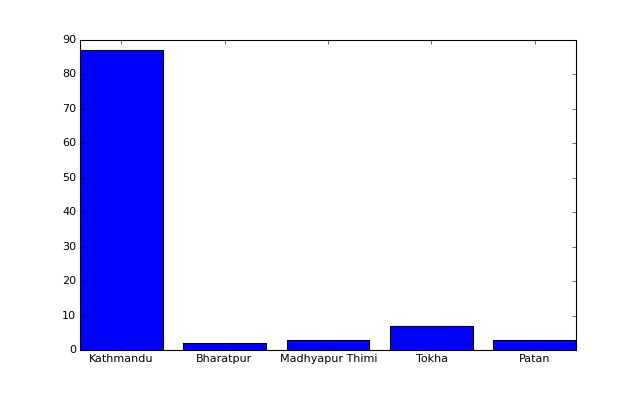

<Container object of 5 artists>

In [34]:

x = collections.Counter(cities)
l = range(len(x.keys()))
plt.figure(figsize=(8,5))
plt.xticks(l, x.keys())
locs, labels = plt.xticks()
plt.bar(l, x.values(), align='center')


---

By: Subigya Kumar Nepal

Link: [Posted at TheLacunaBlog](http://www.thelacunablog.com/?p=9150)

Twitter: [@SkNepal](https://twitter.com/SkNepal)

Last update on: May 14, 2016

---